## Practice Time Series Analysis on Airline Passenger Data
This file will use the naive method

In [72]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv("airline-passenger-traffic.csv", header=None)
df.columns = ['date', 'passengers']
df.date = pd.to_datetime(df.date, format='%Y-%m')
df = df.set_index(df['date'])
df.drop('date', axis=1)


,passengers
date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


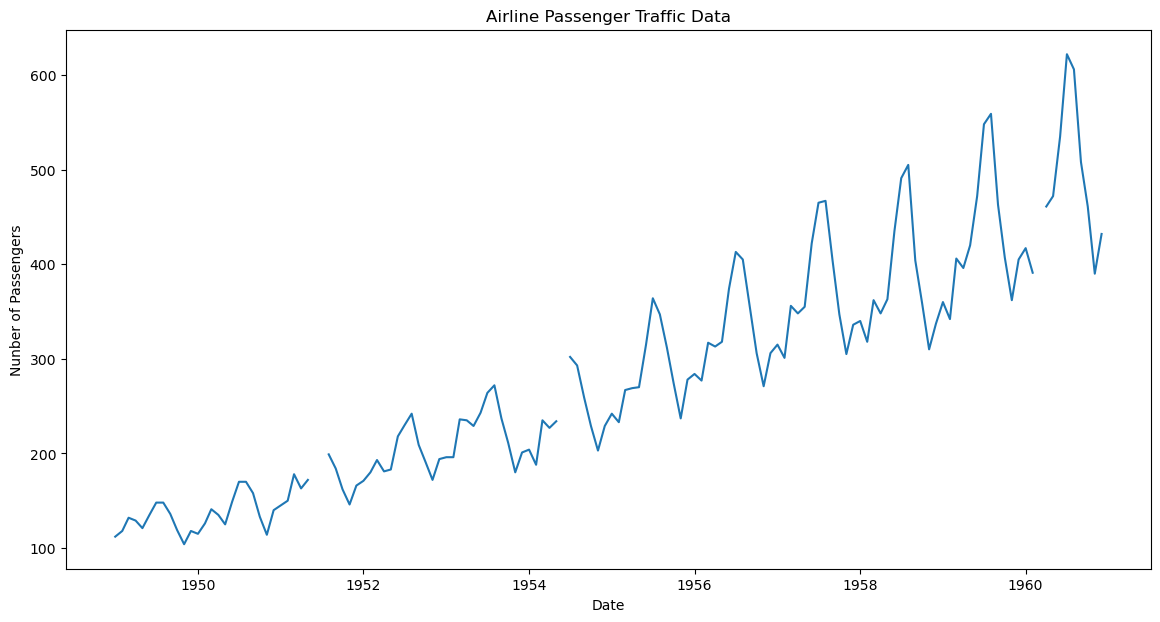

In [74]:
plt.rcParams['figure.figsize'] = (14,7)
plt.plot(df['date'], df['passengers'])
plt.title('Airline Passenger Traffic Data')
plt.xlabel("Date")
plt.ylabel('Nunber of Passengers')
plt.show()

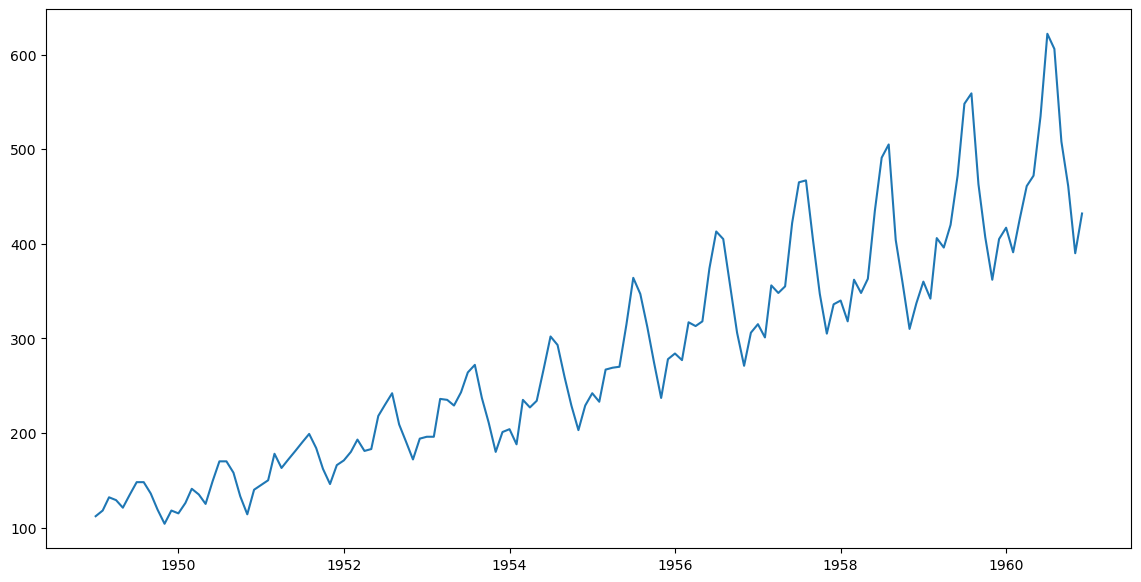

,date,passengers
date,,
1949-01-01,1949-01-01,112.0
1949-02-01,1949-02-01,118.0
1949-03-01,1949-03-01,132.0
1949-04-01,1949-04-01,129.0
1949-05-01,1949-05-01,121.0


In [75]:
# treat missing values using the liner interpolation method
df['passengers'] = df.passengers.interpolate(method='linear')
plt.plot(df['date'], df['passengers'])
plt.show()
df.head()


## Seasonal Additive Decomposition

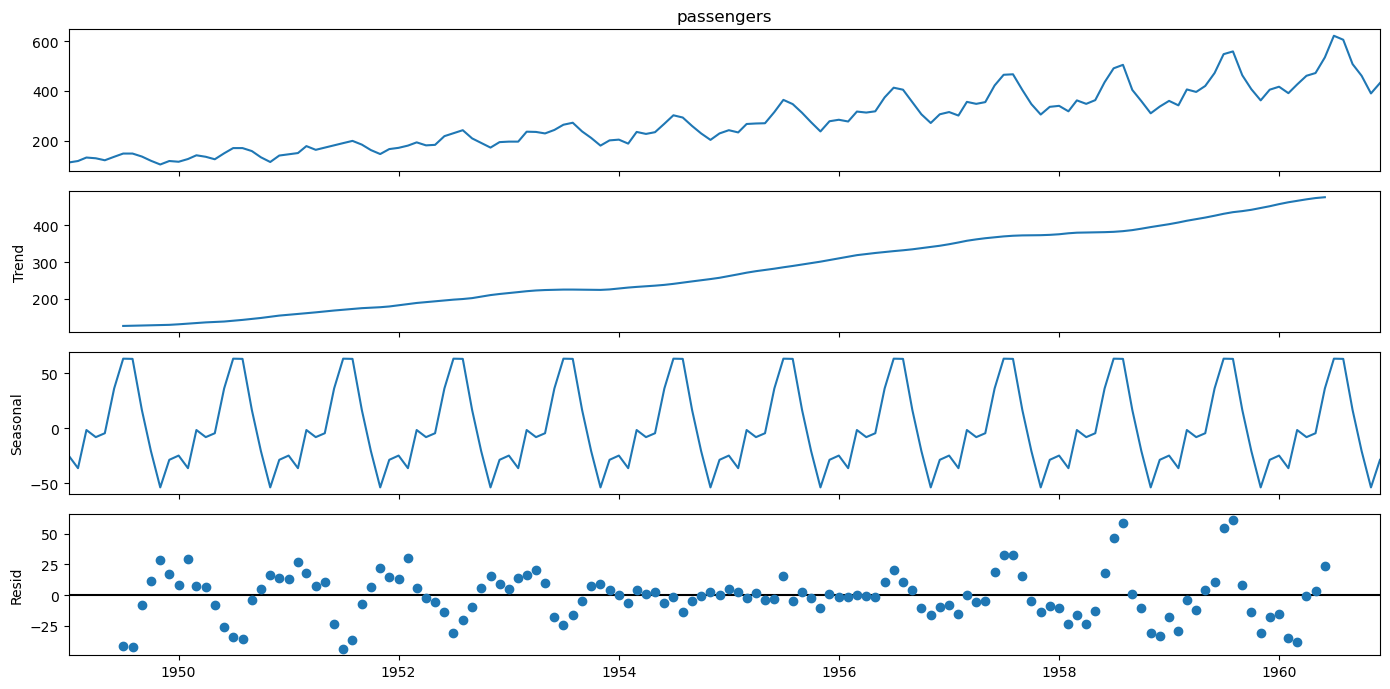

In [76]:
decomposition = sm.tsa.seasonal_decompose(df['passengers'], model='additive')
fig = decomposition.plot()
plt.show()

## Multiplacative Decomposition

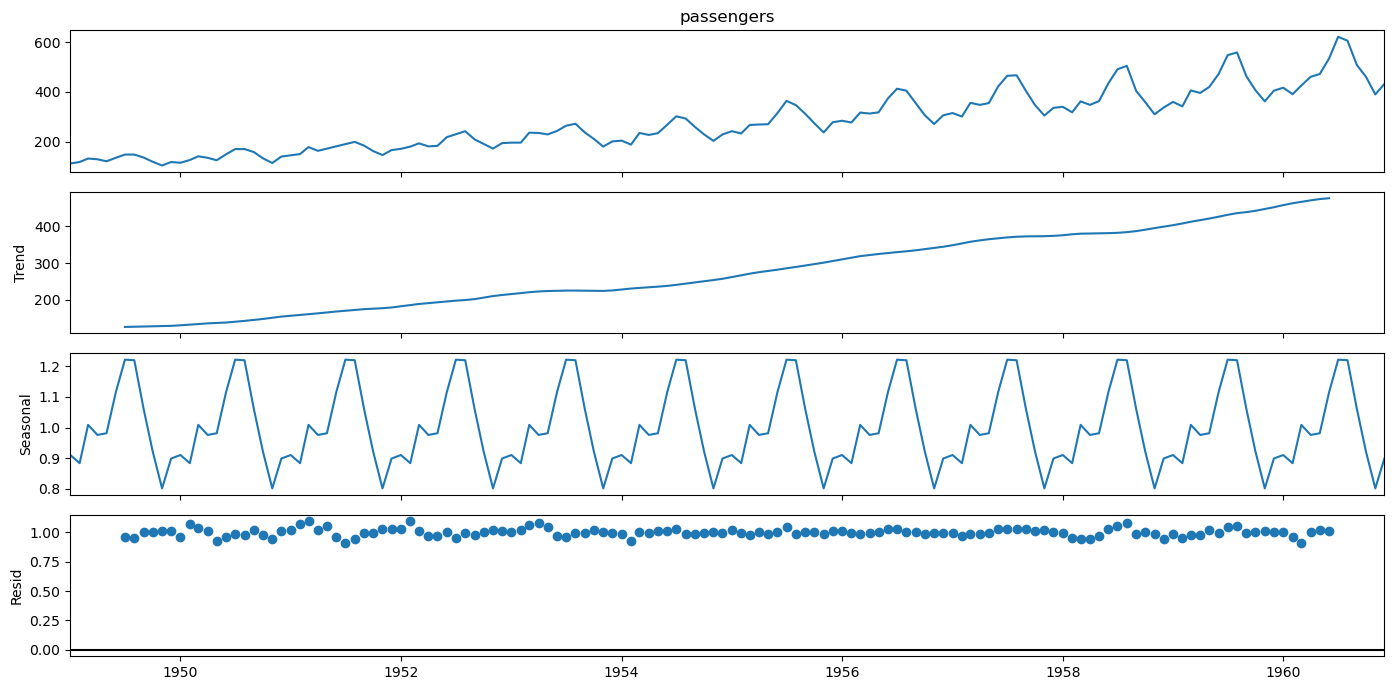

In [77]:
decomposition = sm.tsa.seasonal_decompose(df.passengers, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [78]:
train_test_split_index = int(df.shape[0]*0.80)
train = df[:train_test_split_index+1]
test = df[train_test_split_index:]

In [79]:
def create_forecast(title, function):
    forecast = df[train_test_split_index:].copy()
    forecast[title]=function
    return forecast
yhat = create_forecast('Naive Method', train['passengers'][-1])
yhat


/tmp/ipykernel_7396/360767442.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = create_forecast('Naive Method', train['passengers'][-1])


,date,passengers,Naive Method
date,,,
1958-08-01,1958-08-01,505.0,505.0
1958-09-01,1958-09-01,404.0,505.0
1958-10-01,1958-10-01,359.0,505.0
1958-11-01,1958-11-01,310.0,505.0
1958-12-01,1958-12-01,337.0,505.0
1959-01-01,1959-01-01,360.0,505.0
1959-02-01,1959-02-01,342.0,505.0
1959-03-01,1959-03-01,406.0,505.0
1959-04-01,1959-04-01,396.0,505.0


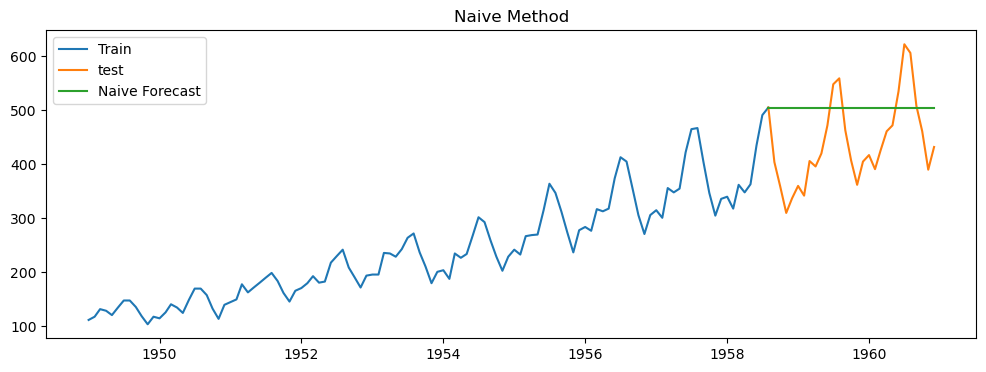

In [82]:
def plot_forecast(forecast, title):
    plt.figure(figsize=(12,4))
    plt.plot(train.passengers, label='Train')
    plt.plot(test.passengers, label = "test")
    plt.plot(yhat['Naive Method'], label = 'Naive Forecast')
    plt.legend(loc='best')
    plt.title(title + ' Method')
    plt.show()
    
plot_forecast(yhat['Naive Method'], 'Naive')

